# 线性判别分析（LDA）算法笔记

## I. 核心思想

**目标**：为分类任务找到一个最优的投影方向。
**直观**：找一个最佳观察角度，让不同类别的数据在该方向上的投影满足：
- **类间距离最大化**（不同类别的中心尽可能远离）
- **类内距离最小化**（同一类别的数据点尽可能集中）

**形象化**："类内点聚拢，类间点分离"

**思考**：LDA算法总的来时是在调控数据点到中心点的距离，其表示距离的方式其实为这个算法的使用带来了一些限制。首先，离散程度(方差)本身是一个标量，这意味着数据点的方向信息被损失了，在不同坐标轴上的数据点信息被完全投影到了一维空间。其次，使用散度矩阵可以在一定程度上保留方向信息，但是矩阵表示度量默认了数据点的分布是类似二次曲线的，这是LDA的限制。

## II. 关键概念与定义

### A. 基本符号
- $C₁, C₂$ ：两个类别
- $N₁, N₂$：各类别样本数量
- $u₁, u₂$：各类别样本均值向量（类心）
- $x_i$：第i个样本特征向量
- $w$：待求的最优投影方向向量

### B. 投影变换
样本 $x_i$ 投影到方向 $w$ 上得到标量值：
$y_i = wᵀ x_i$

## III. 数学建模

### A. 类间散度（应最大化）
衡量投影后两类中心的分离程度：

$(m₁ - m₂)² = [wᵀ(u₁ - u₂)]² = wᵀ S_b w$

其中 **类间散度矩阵**：$S_b = (u₁ - u₂)(u₁ - u₂)ᵀ$，$u$是各个类别的质心。

### B. 类内散度（应最小化）
衡量投影后各类别内部的集中程度：

$s₁² + s₂² = wᵀ S_w w$

其中 **类内散度矩阵**：$S_w = Σ_{x∈C₁}(x-u₁)(x-u₁)ᵀ + Σ_{x∈C₂}(x-u₂)(x-u₂)ᵀ$

### C. Fisher判别准则
将两个目标合并为单一优化问题：

$max J(w) = (wᵀ S_b w) / (wᵀ S_w w)$

## IV. 算法求解

### A. 通用求解方法（特征值问题）

上述优化问题的解等价于广义特征值问题：

$S_w⁻¹ S_b w = λ w$

**数学推导**（拉格朗日乘子法）：
1. 引入约束：$wᵀ S_w w = c$（固定类内散度）
2. 构建拉格朗日函数：$L(w, λ) = wᵀ S_b w - λ(wᵀ S_w w - c)$
3. 对w求导并令为零：$∂L/∂w = 2S_b w - 2λS_w w = 0$
4. 整理得：$S_b w = λ S_w w$
5. 左乘S_w⁻¹得特征方程：$S_w⁻¹ S_b w = λ w$

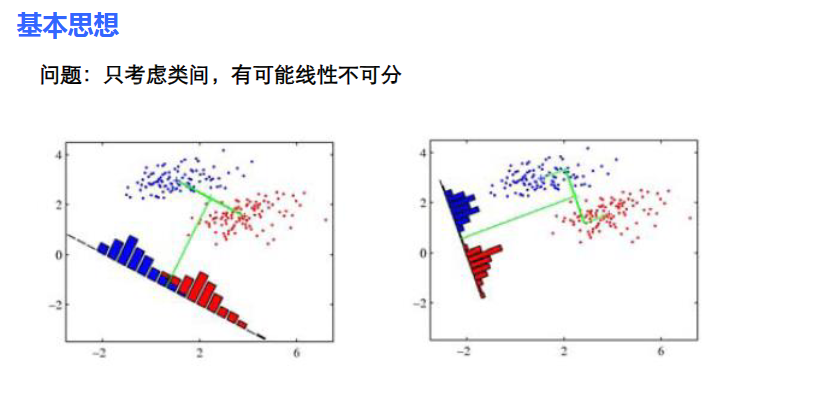
**结论**：最优投影方向 $w$ 是矩阵 $S_w⁻¹ S_b$ 的特征向量，对应的特征值 $λ$ 就是目标函数的最大值。所以我们可以直观的理解LDA算法的广义Rayleigh商的解，
$$S_w^{-1}S_bW = \lambda w$$
对于一般的球状分布的数据，我们只要简单的连线质心就可以做出分类。但是如果数据非球对称，就可能在质心连线方向上出现数据重叠（如图），这就不能很好的对数据进行分类，解决方法是乘以一个类内散度矩阵$S_w$，这个矩阵原本刻画的是数据分布的非对称性特征，此处乘以逆矩阵把非球对称分布的数据转化为球对称，这样质心连线就可以分类了。

### B. 两类问题的简化解

对于两类问题，存在更简洁的解析解，无需进行特征值分解：

$w ∝ S_w⁻¹ (u₁ - u₂)$

**推导过程**：
1. 注意到 $S_b w = (u₁ - u₂)(u₁ - u₂)ᵀ w = β(u₁ - u₂)$，其中β是标量
2. 代入特征方程：$S_w⁻¹ S_b w = S_w⁻¹ [β(u₁ - u₂)] = λ w$
3. 解得：$w = (β/λ) S_w⁻¹ (u₁ - u₂) ∝ S_w⁻¹ (u₁ - u₂)$

**几何解释**：最优方向不是简单的质心连线方向，而是经过数据分布形状校正后的方向。$S_w⁻¹$ 起到了将椭圆分布"拉回"球形的作用。


## V. 分类决策

### A. 计算投影值
对新样本 $x_new$ 进行投影：$y_new = wᵀ x_new$

### B. 决策阈值
通常选择两个投影类心的中点作为阈值：
$c = (wᵀu₁ + wᵀu₂) / 2$

### C. 分类规则
- 如果 $y_new > c$，则判为 $C₁$
- 如果 $y_new < c$，则判为 $C₂$

## VI. 算法特点

### A. 优点
1. 有监督学习，充分利用类别标签
2. 考虑特征间相关性（通过协方差矩阵）
3. 计算效率高，有解析解
4. 在满足假设条件下通常表现良好

### B. 缺点与假设
1. **强假设**：数据服从多元正态分布
2. **同方差性假设**：各类别协方差矩阵相等
3. 只能产生 $K-1$ 个有效判别方向（K为类别数）
4. 对非高斯分布、非线性可分数据效果有限

## VII. 相关算法比较

| 特征 | LDA | PCA | 感知机 |
|------|-----|-----|--------|
| **监督性** | 有监督 | 无监督 | 有监督 |
| **目标** | 最大化类别区分度 | 最大化方差（降维） | 最小化分类错误 |
| **输出** | 分类投影方向 | 主成分（降维） | 分类超平面 |
| **分布假设** | 强（高斯） | 无 | 无 |

## VIII. 关键理解点

1. **LDA是模型驱动的**：基于数据分布假设（高斯分布）
2. **本质是降维**：将高维数据投影到一维进行分类
3. **与欧氏距离的区别**：使用马氏距离，考虑数据协方差结构
4. **适用场景**：各类别分布相似、近似线性可分的分类问题